In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df[df.isna().any(axis=1)]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [7]:
from sklearn.svm import SVC

In [8]:
svc_model = SVC()

svc_model.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       408
           1       0.99      1.00      0.99       471
           2       0.98      0.97      0.98       420
           3       0.97      0.97      0.97       506
           4       0.97      0.97      0.97       397
           5       0.98      0.97      0.97       339
           6       0.99      0.99      0.99       402
           7       0.97      0.97      0.97       438
           8       0.96      0.97      0.96       403
           9       0.97      0.97      0.97       416

    accuracy                           0.98      4200
   macro avg       0.98      0.98      0.98      4200
weighted avg       0.98      0.98      0.98      4200



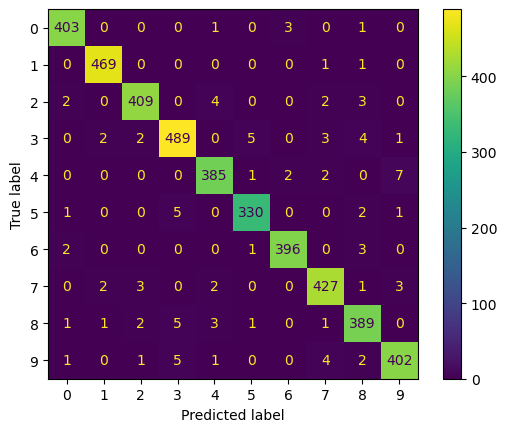

In [9]:
print(classification_report(y_test, svc_model.predict(X_test)))
ConfusionMatrixDisplay.from_estimator(svc_model, X_test, y_test);

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       408
           1       0.94      1.00      0.97       471
           2       0.98      0.96      0.97       420
           3       0.96      0.96      0.96       506
           4       0.98      0.96      0.97       397
           5       0.96      0.96      0.96       339
           6       0.97      0.99      0.98       402
           7       0.96      0.95      0.96       438
           8       0.99      0.92      0.96       403
           9       0.94      0.96      0.95       416

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200



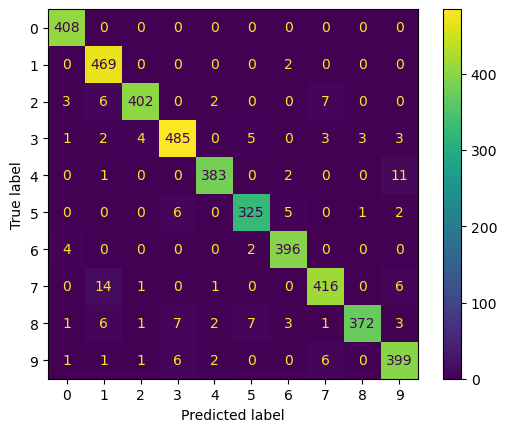

In [11]:
print(classification_report(y_test, knn_model.predict(X_test)))
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test);

In [12]:
knn_model2 = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 8, 10],
}

knn_grid = GridSearchCV(knn_model2, param_grid, verbose=1, cv=3)
knn_grid.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 8, 10]}, verbose=1)

In [13]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       408
           1       0.95      1.00      0.97       471
           2       0.97      0.96      0.97       420
           3       0.97      0.96      0.97       506
           4       0.99      0.96      0.98       397
           5       0.95      0.97      0.96       339
           6       0.98      0.99      0.98       402
           7       0.96      0.96      0.96       438
           8       0.99      0.91      0.95       403
           9       0.95      0.96      0.95       416

    accuracy                           0.97      4200
   macro avg       0.97      0.97      0.97      4200
weighted avg       0.97      0.97      0.97      4200



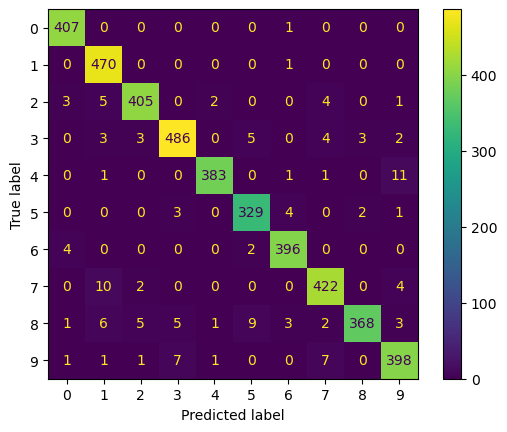

In [14]:
print(classification_report(y_test, knn_grid.predict(X_test)))
ConfusionMatrixDisplay.from_estimator(knn_grid, X_test, y_test);

In [15]:
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
final_model = svc_model

final_pred = final_model.predict(df_test)

final_pred = pd.DataFrame(data=final_pred)
final_pred

,0
0,2
1,0
2,9
3,9
4,3
...,...
27995,9
27996,7
27997,3
27998,9


In [18]:
df_test_index = pd.DataFrame(data=df_test.index + 1)
df_test_index

,0
0,1
1,2
2,3
3,4
4,5
...,...
27995,27996
27996,27997
27997,27998
27998,27999


In [19]:
final_pred_df = pd.concat([df_test_index, final_pred], axis=1)
final_pred_df.columns = ['ImageId', 'Label']
final_pred_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [20]:
final_pred_df.to_csv('submission.csv', index=False)